# EDA On Food-11 image Dataset

In [ ]:
# Importing required libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import zipfile

In [ ]:
# Using Kaggle library to download the dataset
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Creating a kaggle directory for our downloaded api file
!mkdir ~/.kaggle
# Moving the api file and modifying permissions
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# downloading the dataset
!kaggle datasets download -d trolukovich/food11-image-dataset

 99% 1.07G/1.08G [00:13<00:00, 59.6MB/s]
100% 1.08G/1.08G [00:13<00:00, 87.8MB/s]


In [ ]:
# Extracting the downloaded dataset zip file
zip_path = "/content/food11-image-dataset.zip"  # Replace with the path to your uploaded zip file
extract_path = "/content/images"  # Replace with the desired folder path

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

### Visualizing Sample Images From Each Set

In [ ]:
def visualize_sample_images(directory, num_samples_per_class=1):
    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        image_files = os.listdir(category_dir)[:num_samples_per_class]

        for image_file in image_files:
            image_path = os.path.join(category_dir, image_file)
            image = Image.open(image_path)

            plt.imshow(image)
            plt.title(category)
            plt.axis('off')
            plt.show()


In [ ]:
# Specifiying the directories
train_directory = "/content/images/training"
test_directory = "/content/images/evaluation"
validation_directory = "/content/images/validation"

* <font size="+1.5"><b>Training Set</b></font>

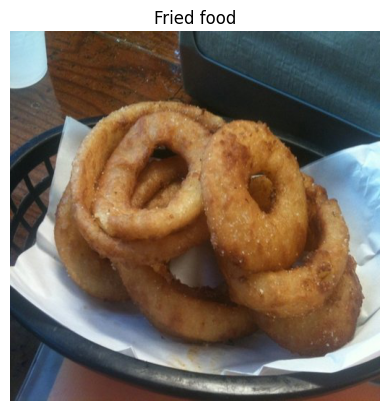

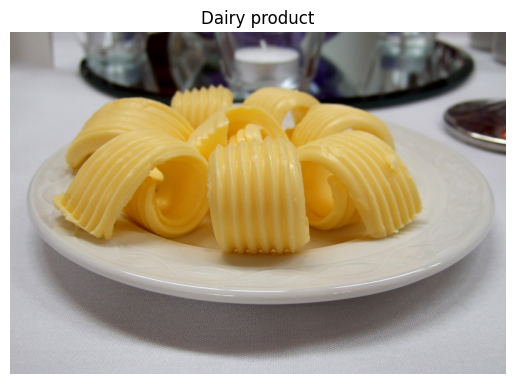

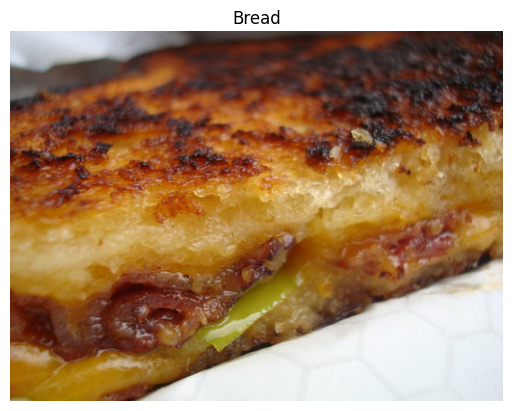

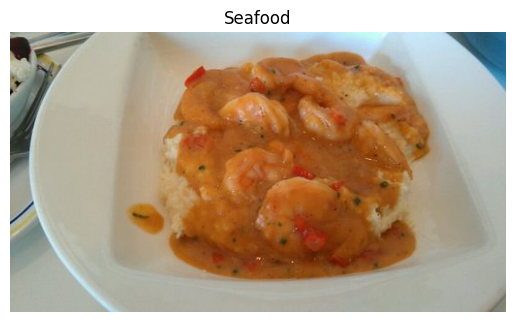

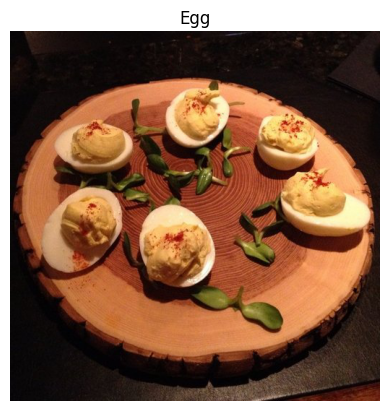

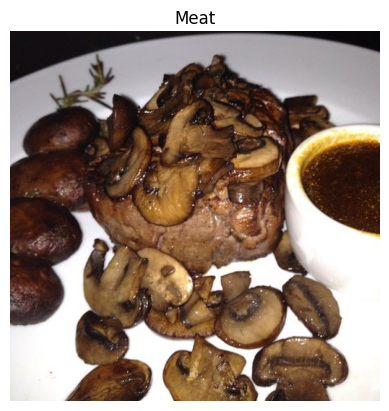

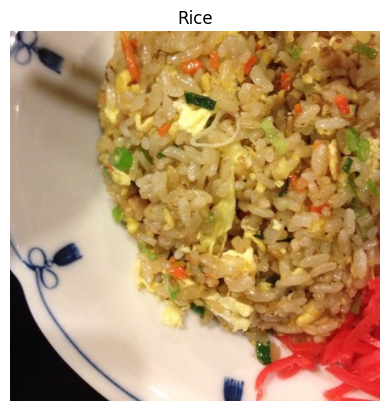

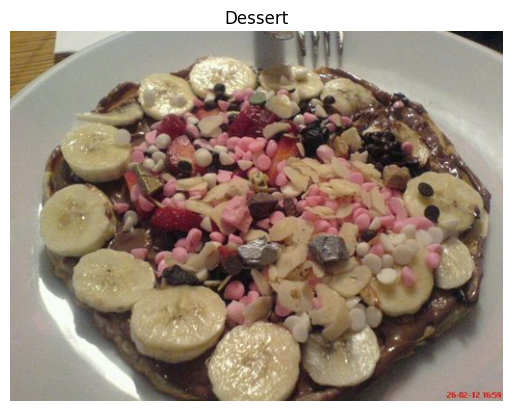

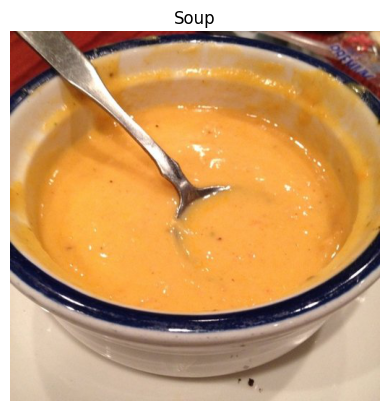

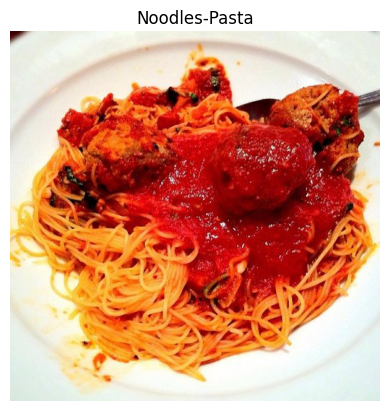

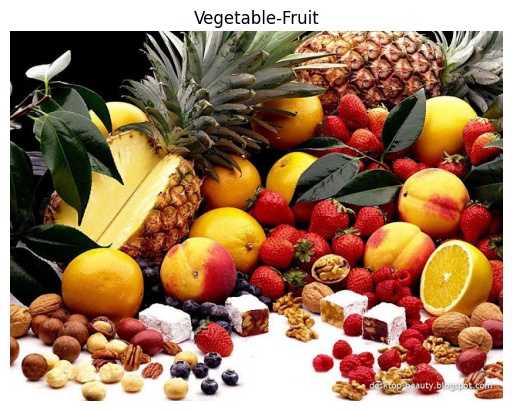

In [ ]:
visualize_sample_images(train_directory)

### Class Distributions

In [ ]:
def plot_class_distribution(directory):
    class_counts = []
    class_labels = []

    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        num_images = len(os.listdir(category_dir))

        class_counts.append(num_images)
        class_labels.append(category)

    plt.bar(class_labels, class_counts)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

* <font size="+1.5"><b>Training Set</b></font>

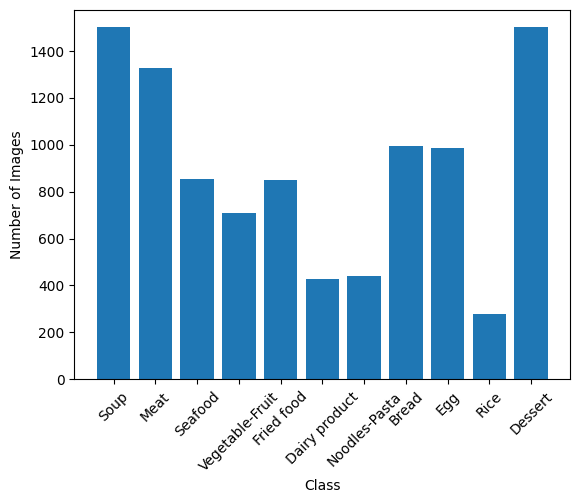

In [ ]:
plot_class_distribution(train_directory)

* <font size="+1.5"><b>Testing Set</b></font>

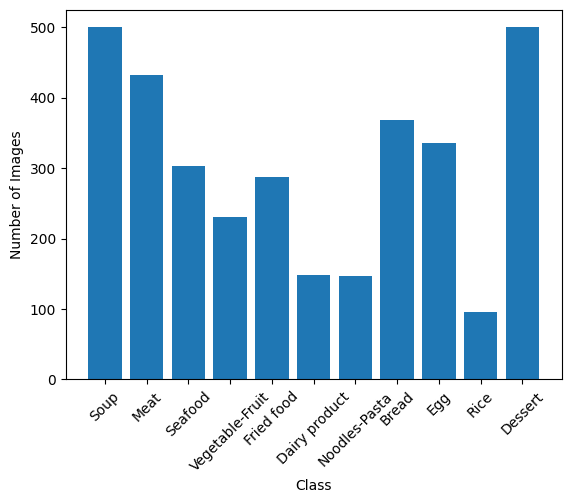

In [ ]:
plot_class_distribution(test_directory)

* <font size="+1.5"><b>Validation Set</b></font>

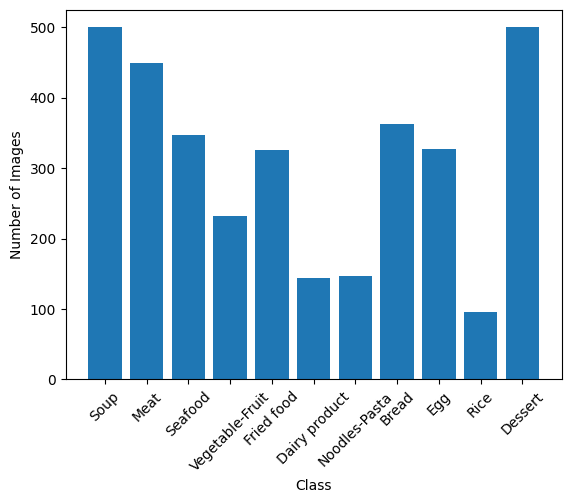

In [ ]:
plot_class_distribution(validation_directory)

<font size="+1.5"><b>Observations:</b></font>
* After looking at the visualizations, It can be said that train, test and validation data have almost same class distribution.
* We can use all of these sets for model building as well as evaluation.

### Analysing Image Sizes

In [ ]:
def analyze_image_sizes(directory):
    image_sizes = []

    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        for image_file in os.listdir(category_dir):
            image_path = os.path.join(category_dir, image_file)
            image = Image.open(image_path)

            image_sizes.append(image.size)

    width, height = zip(*image_sizes)
    plt.hist(width, bins=30, alpha=0.5, label='Width')
    plt.hist(height, bins=30, alpha=0.5, label='Height')
    plt.xlabel('Size')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

* <font size="+1.5"><b>Training Set</b></font>

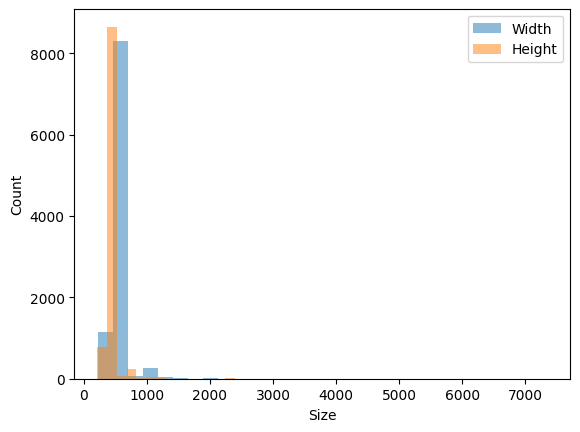

In [ ]:
analyze_image_sizes(train_directory)

* <font size="+1.5"><b>Testing Set</b></font>

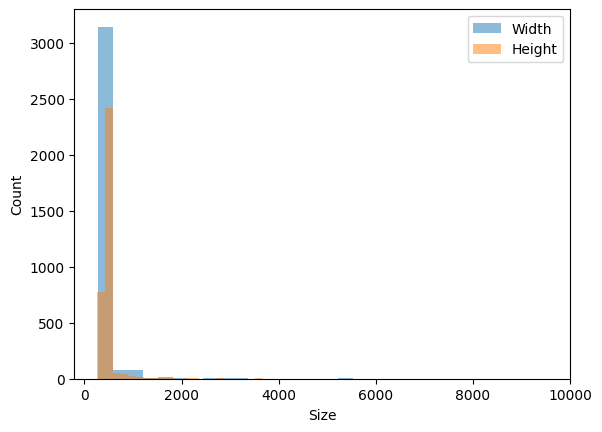

In [ ]:
analyze_image_sizes(test_directory)

* <font size="+1.5"><b>Validation Set</b></font>

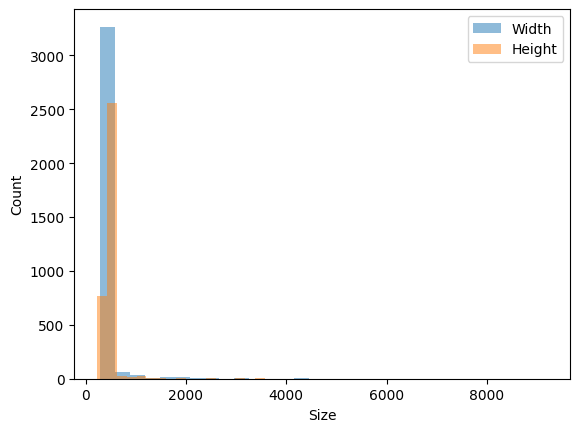

In [ ]:
analyze_image_sizes(validation_directory)

<font size="+1.5"><b>Observations:</b></font>
* After looking at the visualizations, It can be said most of the images in the train, test and validation have almost the same size.
* However, difference in width and height is observed in all the sets. It can be adjusted if we do image preprocessing.

### Aspect Ratio Analysis

In [ ]:
def aspect_ratio_analysis(directory):
    aspect_ratios = []

    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        for image_file in os.listdir(category_dir):
            image_path = os.path.join(category_dir, image_file)
            image = Image.open(image_path)
            width, height = image.size
            aspect_ratio = width / height
            aspect_ratios.append(aspect_ratio)

    plt.hist(aspect_ratios, bins=30, alpha=0.5)
    plt.xlabel('Aspect Ratio')
    plt.ylabel('Count')
    plt.show()

* <font size="+1.5"><b>Training Set</b></font>

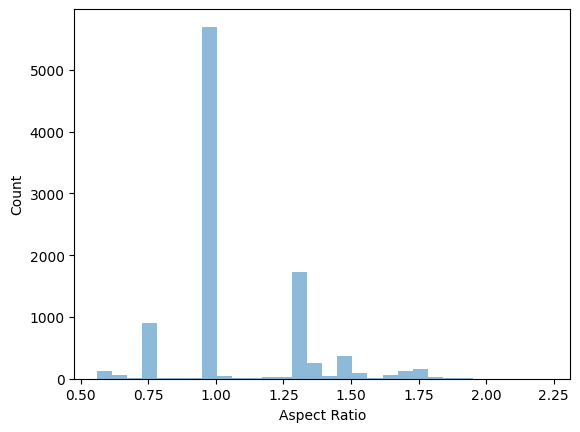

In [ ]:
aspect_ratio_analysis(train_directory)

* <font size="+1.5"><b>Testing Set</b></font>

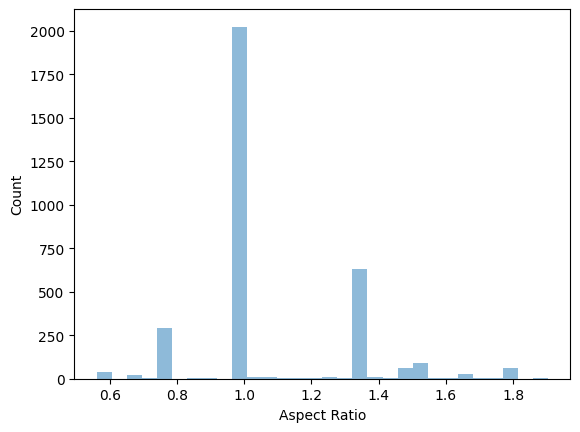

In [ ]:
aspect_ratio_analysis(test_directory)

* <font size="+1.5"><b>Validation Set</b></font>

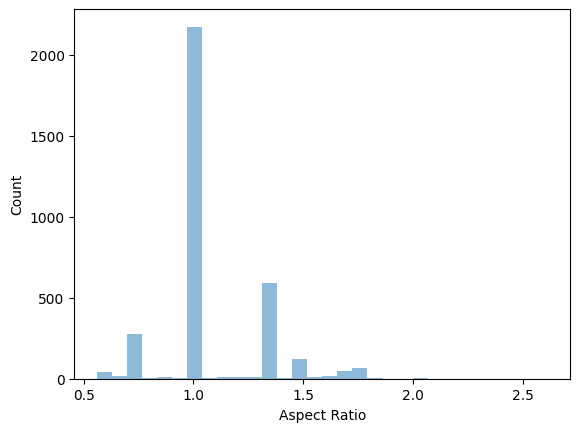

In [ ]:
aspect_ratio_analysis(validation_directory)

<font size="+1.5"><b>Obesrvations:</b></font>
* Same distributions of Aspect Ratio in Train, Test and Validation Set.

**Brightness Analysis**

In [ ]:
def brightness_analysis(directory):
    brightness_values = []

    for category in os.listdir(directory):
        category_dir = os.path.join(directory, category)
        for image_file in os.listdir(category_dir):
            image_path = os.path.join(category_dir, image_file)
            image = cv2.imread(image_path)
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            brightness = np.mean(gray_image)
            brightness_values.append(brightness)

    plt.hist(brightness_values, bins=30, alpha=0.5)
    plt.xlabel('Brightness')
    plt.ylabel('Count')
    plt.show()

* <font size="+1.5"><b>Training Set</b></font>

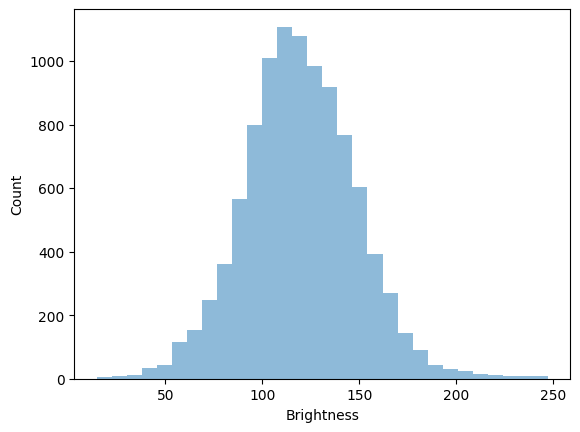

In [ ]:
brightness_analysis(train_directory)

* <font size="+1.5"><b>Testing Set</b></font>

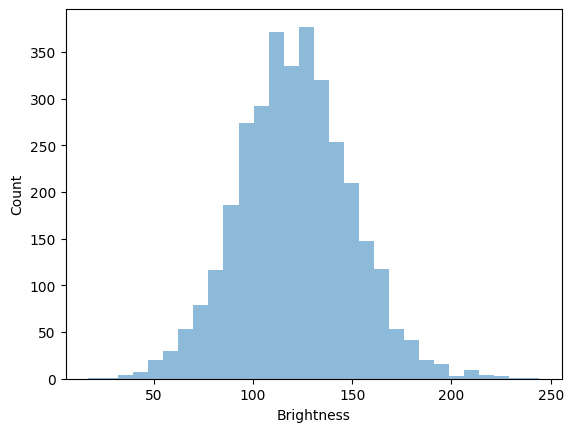

In [ ]:
brightness_analysis(test_directory)

* <font size="+1.5"><b>Validation Set</b></font>

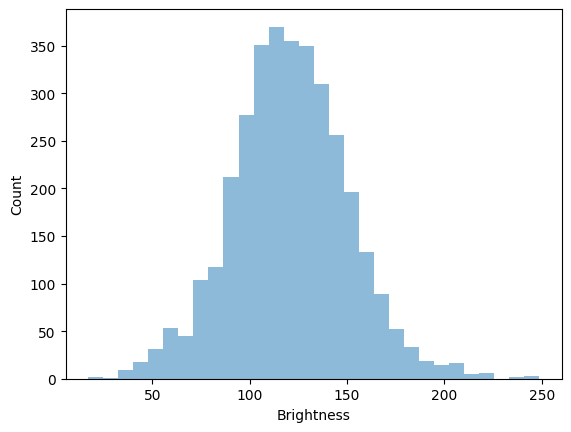

In [ ]:
brightness_analysis(validation_directory)

<font size="+1.5"><b>Observations:</b></font>
* Train and Validation has same distribution of brightness.
* Distribution of brightness is slightly different for Test data. We can adjust the brightness of the images.